# pytorch - 手刻ResNet18
Residual Network :https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

In [1]:
import torch
from torch import Tensor
import torch.nn as nn

def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class RESNET18(nn.Module):
    def __init__(self, num_classes=10):
        super(RESNET18, self).__init__()
        # _resnet('resnet18', BasicBlock, [2, 2, 2, 2])
        channel_ration = 0.1

        norm_layer = nn.BatchNorm2d
        outch =  int(64 * channel_ration)
        self.conv1 = nn.Conv2d(3, outch, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(outch)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        '''
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        '''

        # layer 1
        outch =  int(64 * channel_ration)
        self.l1_p1_conv1 = conv3x3(outch, outch, 1)
        self.l1_p1_bn1 = norm_layer(outch)
        self.l1_relu = nn.ReLU(inplace=True)
        self.l1_p1_conv2 = conv3x3(outch, outch)
        self.l1_p1_bn2 = norm_layer(outch)
        
        self.l1_p2_conv1 = conv3x3(outch, outch, 1)
        self.l1_p2_bn1 = norm_layer(outch)
        self.l1_p2_relu = nn.ReLU(inplace=True)
        self.l1_p2_conv2 = conv3x3(outch, outch)
        self.l1_p2_bn2 = norm_layer(outch)
        
         # layer 2
        inch =  int(64 * channel_ration)
        outch =  int(128 * channel_ration)
        self.downsample2 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )
        self.l2_p1_conv1 = conv3x3(inch, outch, 2)
        self.l2_p1_bn1 = norm_layer(outch)
        self.l2_relu = nn.ReLU(inplace=True)
        self.l2_p1_conv2 = conv3x3(outch, outch)
        self.l2_p1_bn2 = norm_layer(outch)
        
        self.l2_p2_conv1 = conv3x3(outch, outch, 1)
        self.l2_p2_bn1 = norm_layer(outch)
        self.l2_p2_relu = nn.ReLU(inplace=True)
        self.l2_p2_conv2 = conv3x3(outch, outch)
        self.l2_p2_bn2 = norm_layer(outch)
        
        # layer 3
        inch =  int(128 * channel_ration)
        outch =  int(256 * channel_ration)
        self.downsample3 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )    
        self.l3_p1_conv1 = conv3x3(inch, outch, 2)
        self.l3_p1_bn1 = norm_layer(outch)
        self.l3_relu = nn.ReLU(inplace=True)
        self.l3_p1_conv2 = conv3x3(outch, outch)
        self.l3_p1_bn2 = norm_layer(outch)
        
        self.l3_p2_conv1 = conv3x3(outch, outch, 1)
        self.l3_p2_bn1 = norm_layer(outch)
        self.l3_p2_relu = nn.ReLU(inplace=True)
        self.l3_p2_conv2 = conv3x3(outch, outch)
        self.l3_p2_bn2 = norm_layer(outch)
        
        # layer 4
        inch =  int(256 * channel_ration)
        outch =  int(512 * channel_ration)
        self.downsample4 = nn.Sequential(
                conv1x1(inch, outch, 2),
                norm_layer(outch),
            )     
        self.l4_p1_conv1 = conv3x3(inch, outch, 2)
        self.l4_p1_bn1 = norm_layer(outch)
        self.l4_relu = nn.ReLU(inplace=True)
        self.l4_p1_conv2 = conv3x3(outch, outch)
        self.l4_p1_bn2 = norm_layer(outch)
        
        self.l4_p2_conv1 = conv3x3(outch, outch, 1)
        self.l4_p2_bn1 = norm_layer(outch)
        self.l4_p2_relu = nn.ReLU(inplace=True)
        self.l4_p2_conv2 = conv3x3(outch, outch)
        self.l4_p2_bn2 = norm_layer(outch)
   
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(outch , num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):    
        # 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
                
        # 2,3
        identity11 = x
        x = self.l1_p1_conv1(x)
        x = self.l1_p1_bn1(x)
        x = self.l1_relu(x)
        x = self.l1_p1_conv2(x)
        x = self.l1_p1_bn2(x)
        x += identity11
        x = self.l1_relu(x)
        # 4,5
        identity12 = x
        x = self.l1_p2_conv1(x)
        x = self.l1_p2_bn1(x)
        x = self.l1_p2_relu(x)
        x = self.l1_p2_conv2(x)
        x = self.l1_p2_bn2(x)
        x += identity12
        x = self.l1_p2_relu(x)
        
        
        # 6,7
        identity21 = self.downsample2(x)
        x = self.l2_p1_conv1(x)
        x = self.l2_p1_bn1(x)
        x = self.l2_relu(x)
        x = self.l2_p1_conv2(x)
        x = self.l2_p1_bn2(x)
        x += identity21
        x = self.l2_relu(x)
        # 8,9
        identity22 = x
        x = self.l2_p2_conv1(x)
        x = self.l2_p2_bn1(x)
        x = self.l2_p2_relu(x)
        x = self.l2_p2_conv2(x)
        x = self.l2_p2_bn2(x)
        x += identity22
        x = self.l2_p2_relu(x)
        
        
        # 10,11
        identity31 = self.downsample3(x)
        x = self.l3_p1_conv1(x)
        x = self.l3_p1_bn1(x)
        x = self.l3_relu(x)
        x = self.l3_p1_conv2(x)
        x = self.l3_p1_bn2(x)
        x += identity31
        x = self.l3_relu(x)
        # 12,13
        identity32 = x
        x = self.l3_p2_conv1(x)
        x = self.l3_p2_bn1(x)
        x = self.l3_p2_relu(x)
        x = self.l3_p2_conv2(x)
        x = self.l3_p2_bn2(x)
        x += identity32
        x = self.l3_p2_relu(x)
        
                # 14,15
        identity41 = self.downsample4(x)
        x = self.l4_p1_conv1(x)
        x = self.l4_p1_bn1(x)
        x = self.l4_relu(x)
        x = self.l4_p1_conv2(x)
        x = self.l4_p1_bn2(x)
        x += identity41
        x = self.l4_relu(x)
        
        # 16,17
        identity42 = x
        x = self.l4_p2_conv1(x)
        x = self.l4_p2_bn1(x)
        x = self.l4_p2_relu(x)
        x = self.l4_p2_conv2(x)
        x = self.l4_p2_bn2(x)
        x += identity42
        x = self.l4_p2_relu(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x
    

In [2]:
restnet18_ = RESNET18(num_classes=10)
print(restnet18_)
dummy_input = torch.randn(1, 3, 224, 224)
out = restnet18_(dummy_input)
torch.onnx.export(restnet18_, dummy_input, "restnet18_.onnx", opset_version=11)

RESNET18(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (l1_p1_conv1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p1_bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_relu): ReLU(inplace=True)
  (l1_p1_conv2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p1_bn2): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_p2_conv1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (l1_p2_bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (l1_p2_relu): ReLU(inplace=True)
  (l1_p2_conv2): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), paddi

C:\Users\user\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Network visualization
Netron: https://netron.app/
<br>
https://github.com/lutzroeder/netron

In [3]:
from torchvision import datasets, transforms

use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
print(device)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 步驟1. data loader處理 
mytransform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

n_batch=256
total_epoch = 150
milestones=[30,60,90,120]

model = RESNET18(num_classes=10).to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)

dataset_train = datasets.CIFAR10(root='./dataset', train=True,  download=False, transform=mytransform)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=n_batch, num_workers=0, shuffle=True)
testset = datasets.CIFAR10(root='./dataset', train=False, download=False, transform=mytransform)
testloader = torch.utils.data.DataLoader(testset, batch_size=n_batch, shuffle=False)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)

cuda


In [4]:
def evalmodel(model, testloader, loss):
    model.eval()
    test_loss_cnn = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(testloader):
            data, target = data.to(device), target.to(device)
            output_cnn = model(data)
            loss_cnn = loss(output_cnn,target)  
            test_loss_cnn += loss_cnn
            _, predicted = torch.max(output_cnn.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
        # the class with the highest energy is what we choose as prediction

    test_loss_cnn /= len(testloader.dataset)
    acc = 100 * correct / total
    return test_loss_cnn, acc

def train(model, optimizer,dataloader_train, testloader, loss, total_epoch, scheduler):
    # 步驟5. CNN模型開始訓練
    log_loss_train=[]
    log_loss_test=[]
    
    for epoch in range(total_epoch):
        # train
        model.train()
        train_loss_cnn = 0
        for batch_idx, (data, target) in enumerate(dataloader_train):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output_cnn = model(data)
            loss_cnn = loss(output_cnn,target)  
            train_loss_cnn += loss_cnn
            loss_cnn.backward()
            optimizer.step()
        train_loss_cnn /= len(dataloader_train.dataset)
        scheduler.step()
    
        if epoch % 10 == 0:
            train_loss, train_acc= evalmodel(model, dataloader_train, loss)
            test_loss, test_acc= evalmodel(model, testloader, loss)
            
            log_loss_train.append(train_loss)
            log_loss_test.append(test_loss)
            print('learning rate:{}'.format(scheduler.get_last_lr()[0]))
            print('CNN[epoch: [{}/{}], Average loss (Train):{:.5f}, Average loss (test):{:.5f}, acc(train):{:.4f}, acc(test):{:.4f}'.format(
                epoch+1, total_epoch, train_loss, test_loss, train_acc, test_acc))
                      
    print('CNN[epoch: [{}/{}], Average loss (Train):{:.5f}, Average loss (test):{:.5f}, acc(train):{:.4f}, acc(test):{:.4f}'.format(
                epoch+1, total_epoch, train_loss, test_loss, train_acc, test_acc))
    print('training done.')
    return log_loss_train, log_loss_test

In [5]:
print('*'*50)
print('Training....')
loss_log_rain, loss_log_test = train(model, optimizer, dataloader_train, testloader, criterion, total_epoch=total_epoch, scheduler=scheduler)


**************************************************
Training....
learning rate:0.01
CNN[epoch: [1/150], Average loss (Train):0.00644, Average loss (test):0.00663, acc(train):38.5560, acc(test):38.1400
learning rate:0.01
CNN[epoch: [11/150], Average loss (Train):0.00444, Average loss (test):0.00516, acc(train):59.4760, acc(test):53.4200
learning rate:0.01
CNN[epoch: [21/150], Average loss (Train):0.00380, Average loss (test):0.00495, acc(train):65.2480, acc(test):56.4700
learning rate:0.005
CNN[epoch: [31/150], Average loss (Train):0.00311, Average loss (test):0.00504, acc(train):71.8820, acc(test):57.5700
learning rate:0.005
CNN[epoch: [41/150], Average loss (Train):0.00273, Average loss (test):0.00534, acc(train):75.7760, acc(test):56.9600
learning rate:0.005
CNN[epoch: [51/150], Average loss (Train):0.00266, Average loss (test):0.00574, acc(train):75.8140, acc(test):56.3800
learning rate:0.0025
CNN[epoch: [61/150], Average loss (Train):0.00206, Average loss (test):0.00591, acc(train):

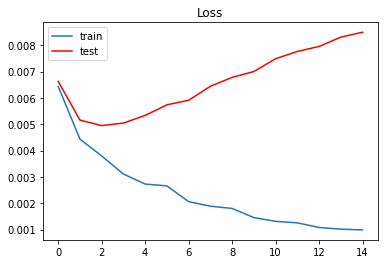

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_log_rain)
plt.plot(loss_log_test,'r')
plt.legend(['train','test'])
plt.title('Loss')
plt.show()

## 小結論
<font size=4>
模型如果越複雜，資料的變異不夠，越容易產生overfitting的問題。<br>
先不管training tricks的方式來避免overfitting的問題。<br>
最簡單的方式就是前面07_pytorch_classification_DataAugumentionImprove.ipynb範例，利用資料增強的方式，增加資料的變異避免overfitting的問題發生。<br>